In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
COLOR = 'yellow'

def set_spines(ax): 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.spines['bottom'].set_color(COLOR)
    ax.spines['left'].set_color(COLOR)

    # Make ticks and tick labels red for both x and y axes
    ax.tick_params(axis='x', colors=COLOR)  # X-axis ticks and labels
    ax.tick_params(axis='y', colors=COLOR)  # Y-axis ticks and labels
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
               labelbottom=False, labelleft=False)


In [3]:
def load_diabetes():
    x_columns = {'bp': 'bloodPressure', 
                 'bmi': 'bodyMassIndex',
                 's1': 'totalSerumCholesterol', 
                 's2': 'lowDensityLipoproteins',
                 's3': 'highDensityLipoproteins',
                 's4': 'totalCholesterol',
                 's5': 'serumTriglyceridesLevel',
                 's6': 'bloodSugarLevel'}
    x, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
    x = x.rename(columns=x_columns)
    y = pd.DataFrame({'diseaseProgression': y})
    return x, y

### Linear Regression

Intercept 152.13348416289617, Coefficient 949.4352603840388 


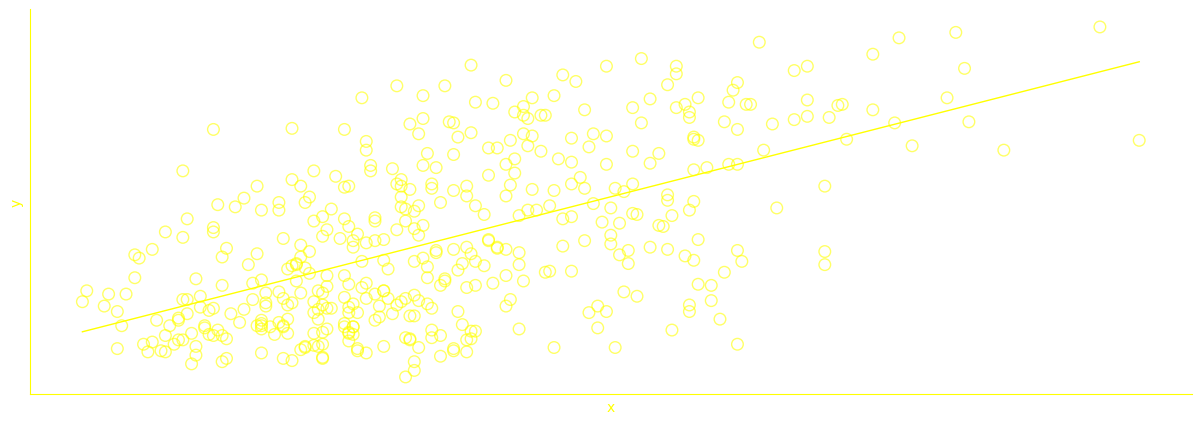

In [4]:
from sklearn.linear_model import LinearRegression

x, y = load_diabetes()

# Todo test train split
x_train, y_train = x, y
x_test, y_test = x, y


regr = LinearRegression()
regr.fit(x_train[['bodyMassIndex']], y_train)
print(f"Intercept {regr.intercept_[0]}, Coefficient {regr.coef_[0,0]} ")
x_pred = x_test[['bodyMassIndex']].sort_values(by='bodyMassIndex')
y_pred = regr.predict(x_pred)
    
def plot_linear_regression():
    fig, ax = plt.subplots(figsize=(15,5))
    ax.scatter(x_train.bodyMassIndex, y, color=COLOR, alpha=.6, facecolor='none', label='data',s=70)
    ax.plot(x_pred, y_pred, '-',  color=COLOR, label = 'linear fit', lw=1)
    ax.set_xlabel('x', color=COLOR)
    ax.set_ylabel('y', color=COLOR)
    set_spines(ax)
    #ax.legend()
    plt.savefig("../slides/neural_networks/assets/linear_regression.svg", format="svg", bbox_inches='tight', transparent=True)
    

plot_linear_regression()

### 1-D Optimizer

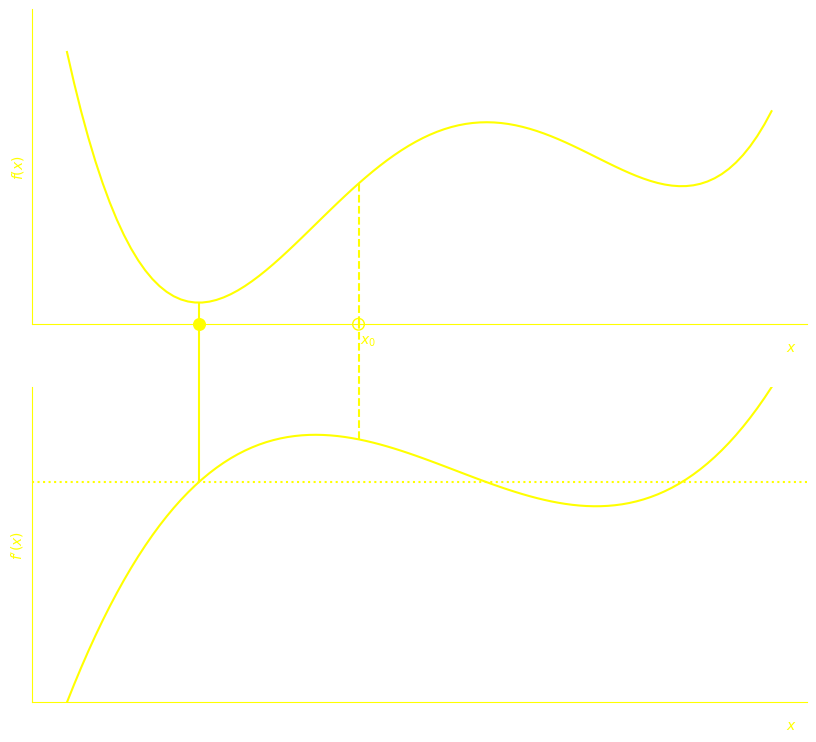

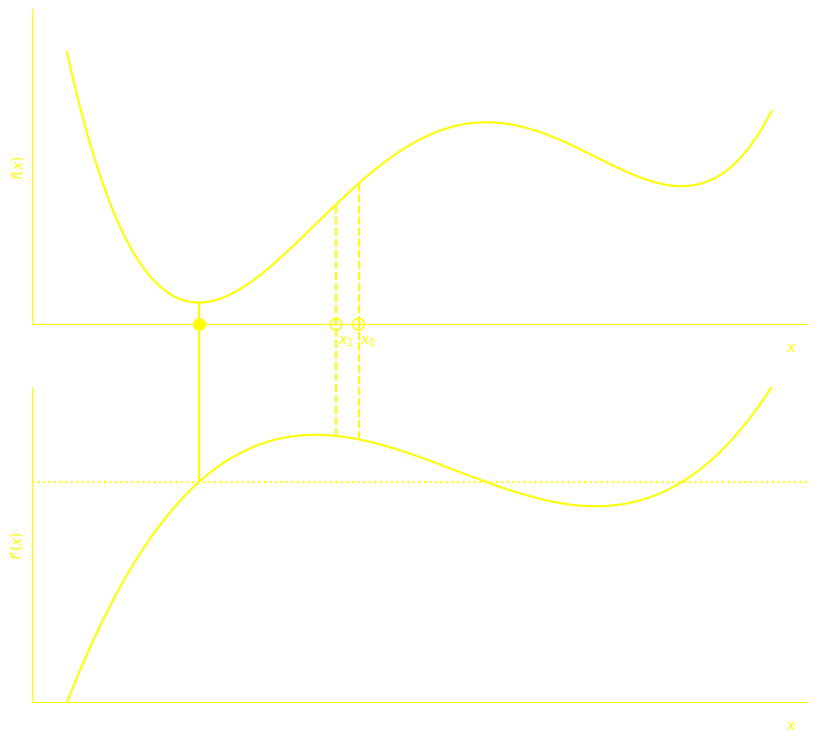

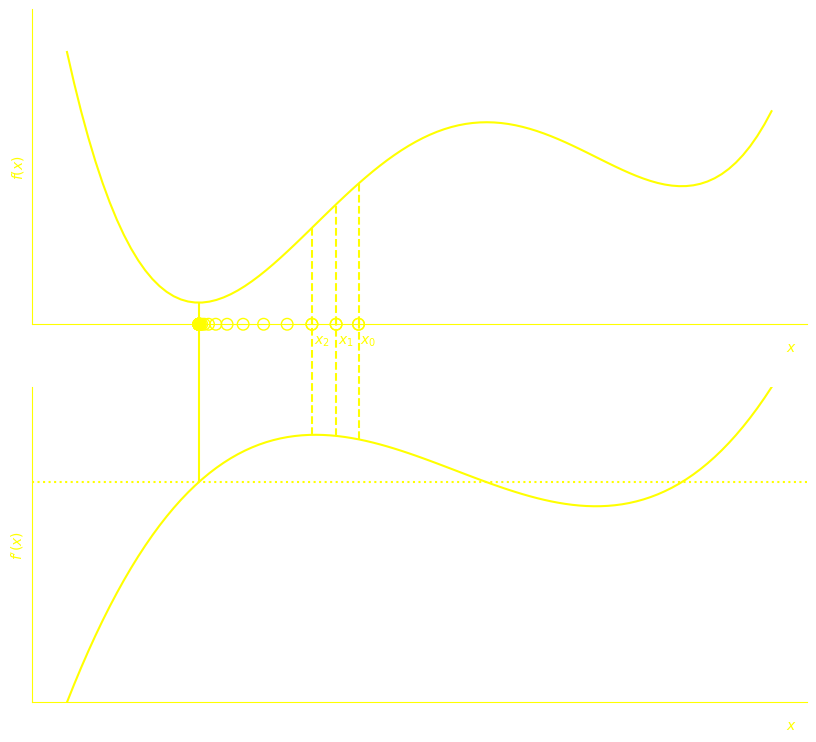

In [6]:
# Rewriting the code after environment reset

import numpy as np

# Objective function
def objective_function(x):
    return (x-1)**2 * (x + 1)**2  + .5*x  

# Gradient (derivative) of the objective function
def gradient(x):
    return 4 * x * (x+1) * (x-1) + .5

# Implementing gradient descent with constant step size (line width)
def gradient_descent(func, grad, initial_x, step_size, max_iters=100, tol=1e-6):
    x = initial_x
    x_history = [x]
    
    for i in range(max_iters):
        grad_value = grad(x)
        # Update x by moving in the negative gradient direction
        x_new = x - step_size * grad_value
        # Store the new x value
        x_history.append(x_new)
        # Stop if the change in x is smaller than the tolerance
        delta = abs(x_new - x)
        #delta = np.sqrt(((t - alpha_zero)**2).sum())
        if delta < tol:
            break
        x = x_new
    return x, np.array(x_history)



# Run gradient descent



def plot_opt(optimum, history, optimization_steps:int=None, add_all_steps=False, path=None):
    fig, axs = plt.subplots(2, figsize=(10,9), sharex=False)
    ax = axs[0]
    set_spines(ax)
    ax.set_ylabel('$f(x)$', color=COLOR)
    ax.set_xlabel('$x$', color=COLOR)
    ax.xaxis.set_label_coords(.98, -0.05)
    
    # plot function
    xs = np.linspace(-1.6, 1.3, 100)
    ax.plot(xs, objective_function(xs), color=COLOR)
    zero_line = -.7
    ax.set_ylim(zero_line, 2)
    #plot goal
    ax.scatter(optimum, zero_line, color=COLOR, s=70, clip_on=False)    
    ax.vlines(optimum, ymin=zero_line, ymax=objective_function(final_x), colors=COLOR)

    # plot optimization steps
    if optimization_steps:
        if optimization_steps == 'all':
            x = history
        else:
            x = history[:optimization_steps]
        ax.scatter(x, (np.ones_like(x) * zero_line), color=COLOR, facecolor='none', s=70, clip_on=False)    
        ax.vlines(x, ymin=zero_line, ymax=objective_function(x), colors=COLOR, linestyles='dashed', label='vline')

        # Set the custom ticks and labels
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
               labelbottom=True, labelleft=False)
        ax.set_xticks(x+ .04)
        ax.set_xticklabels([f'$x_{s}$' for s in range(len(x))])
        
    if add_all_steps: 
        ax.scatter(history, (np.ones_like(history) * zero_line), color=COLOR, facecolor='none', s=70, clip_on=False)    
        
    

    axs[1].set_ylabel("$f'(x)$", color=COLOR)
    axs[1].set_xlabel("$x$", color=COLOR)
    axs[1].xaxis.set_label_coords(.98, -0.05)
    grads = gradient(xs)
    axs[1].plot(xs, grads, color=COLOR)
    axs[1].axhline(0, color=COLOR, ls=":")
    # at opt
    axs[1].vlines(optimum, ymin=gradient(optimum), ymax=grads.max()+3, colors=COLOR, clip_on=False)
    if optimization_steps:
        axs[1].vlines(x, ymin=gradient(x), ymax=grads.max()+3, colors=COLOR, linestyles='dashed', label='vline', clip_on=False)
    axs[1].set_ylim(grads.min(), grads.max())
    
    set_spines(axs[1])
    if path: 
        plt.savefig(f"../slides/neural_networks/assets/{path}", format="svg", bbox_inches='tight', transparent=True)
        
final_x, x_history = gradient_descent(objective_function, gradient, -.4, 0.05, max_iters=100)
plot_opt(final_x, x_history, 1, path='1-d-optimizer_step_0.svg')
plot_opt(final_x, x_history, 2, path='1-d-optimizer_step_1.svg')
plot_opt(final_x, x_history, 3,  add_all_steps=True, path='1-d-optimizer_step_all.svg')



### 2-d optimizer

In [ ]:
def add_intercept(x):
    return x.assign(intercept = 1)

x_mat = add_intercept(x)[['bodyMassIndex', 'intercept']].values
y_mat = y.values

def loss(alpha):
    l = x_mat @ alpha - y_mat
    l = l.transpose() @ l
    return l[0,0]
    

def gradient(alpha):
    return  2 * x_mat.transpose() @ x_mat @ alpha - 2 * x_mat.transpose() @ y_mat
    
    

In [ ]:
import numpy as np
alpha_zero = np.zeros((2,1))
t = np.ones((2,1))

In [ ]:
gradient_descent(loss, gradient, alpha_zero, step_size=.1)

In [ ]:
np.sqrt(((t - alpha_zero)**2).sum())